# 1. Load

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar as cbar
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [6]:
pathway_anly_50base_file = "(no amp)EnrichFiles/PathEnrich_summary/pathway_enrich_meta_50base.csv"
pathway_anly_50base = pd.read_csv(pathway_anly_50base_file, header = 0, index_col=0)
pathway_anly_50base.head(3)

,pathway_id,lac01_up_percentage,lac50_up_percentage,lac01_down_percentage,lac50_down_percentage,lac50_lac01_similarity,lac50_lac01_similarity_p_value,lac50_NES,lac01_NES,NAME,pwy_size
4,PWY0-461,0.5,1.0,0.0,0.0,-0.9999999999999999,NC,1.351552,1.839280,lysine degradation I,2
20,PWY-6019,1.0,1.0,0.0,0.0,0.9999999999999999,NC,3.234241,2.697386,pseudouridine degradation,2
35,PWY0-1324,1.0,1.0,0.0,0.0,0.5,0.6666666666666667,0.000000,0.000000,<i>N</i>-acetylneuraminate and <i>N</i>-acetyl...,3


In [7]:
pathway_anly_50base.shape

(362, 11)

# 2. Rearrange dataframe based on lac50 NES and similarities

In [8]:
pathway_anly = pathway_anly_50base[["pathway_id", "NAME", "pwy_size", 
                                    "lac50_lac01_similarity", "lac50_lac01_similarity_p_value",
                                    "lac50_NES", "lac01_NES", ]].copy()

In [9]:
pathway_anlysorted = pathway_anly.sort_values(["lac50_NES", "lac01_NES"], ascending=[False, False]).reset_index().drop("index", axis=1).copy()
pathway_anlysorted.head(3)

,pathway_id,NAME,pwy_size,lac50_lac01_similarity,lac50_lac01_similarity_p_value,lac50_NES,lac01_NES
0,PWY-6019,pseudouridine degradation,2,0.9999999999999999,NC,3.234241,2.697386
1,PWY-66,GDP-L-fucose biosynthesis I (from GDP-D-mannose),2,0.9999999999999999,NC,2.992698,2.429172
2,PWY0-661,PRPP biosynthesis II,2,0.9999999999999999,NC,2.881936,1.723706


<AxesSubplot:>

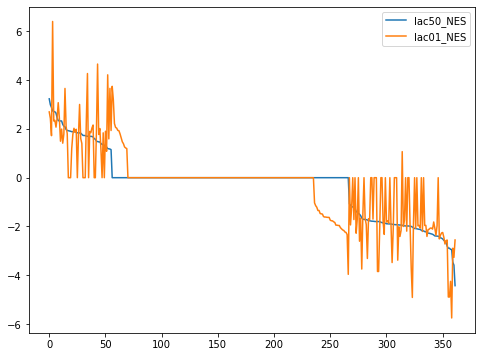

In [10]:
pathway_anlysorted[["lac50_lac01_similarity", 
                    "lac50_NES", "lac01_NES", 
                    ]].plot.line(figsize = (8,6))

array([[<AxesSubplot:title={'center':'pwy_size'}>,
        <AxesSubplot:title={'center':'lac50_NES'}>],
       [<AxesSubplot:title={'center':'lac01_NES'}>, <AxesSubplot:>]],
      dtype=object)

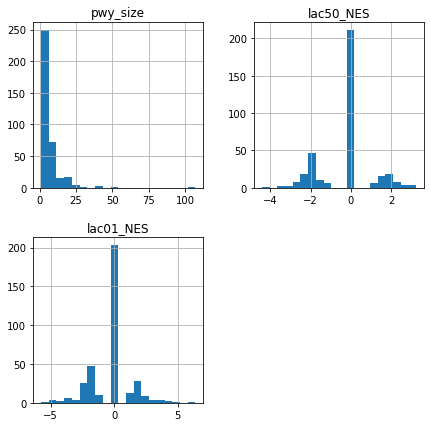

In [11]:
pathway_anlysorted.hist(bins = 20, figsize=(7, 7))

In [12]:
pathway_anlysorted[pathway_anlysorted!=0].dropna(axis=0, how="all", subset=["lac50_NES", "lac01_NES"]).shape

(196, 7)

In [13]:
enriched_pathways = pathway_anlysorted[pathway_anlysorted!=0].dropna(axis=0, how="all", subset=["lac50_NES", "lac01_NES"]).fillna(0.0).sort_values(by = "pwy_size").reset_index(drop=True).copy()
enriched_pathways.head(3)

,pathway_id,NAME,pwy_size,lac50_lac01_similarity,lac50_lac01_similarity_p_value,lac50_NES,lac01_NES
0,BGALACT-PWY,lactose degradation III,1,NC,NC,-1.952792,1.068988
1,GLNSYN-PWY,glutamine biosynthesis I,1,NC,NC,-2.023915,-4.911803
2,BSUBPOLYAMSYN-PWY,spermidine biosynthesis I,1,NC,NC,-1.998855,-3.701418


In [14]:
enriched_pathways.to_csv("(no amp)EnrichFiles/PathEnrich_summary/OnlyEnrichedPaths.csv")

# lac50 lac0.1 Plots

In [15]:
enrich_50_01 = enriched_pathways[["pathway_id", "NAME", "pwy_size", 
                                  "lac50_lac01_similarity",
                                  "lac50_NES", "lac01_NES"
                                 ]]
enrich_50_01 = enrich_50_01[(enrich_50_01["lac50_NES"]!=0) | (enrich_50_01["lac01_NES"]!=0)].reset_index(drop = True).copy()

array([[<AxesSubplot:title={'center':'pwy_size'}>,
        <AxesSubplot:title={'center':'lac50_NES'}>],
       [<AxesSubplot:title={'center':'lac01_NES'}>, <AxesSubplot:>]],
      dtype=object)

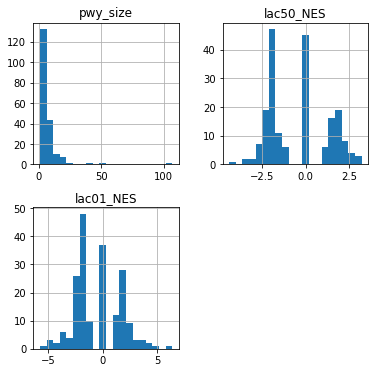

In [16]:
enrich_50_01.hist(figsize = (6,6), bins = 20)

In [17]:
(enrich_50_01["pwy_size"]).describe()

count    196.000000
mean       6.255102
std        9.672919
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      107.000000
Name: pwy_size, dtype: float64

In [18]:
(enrich_50_01["pwy_size"]**1.8).describe()

count     196.000000
mean       64.719128
std       338.686097
min         1.000000
25%         3.482202
50%        12.125733
75%        42.224253
max      4496.667753
Name: pwy_size, dtype: float64

array([[<AxesSubplot:title={'center':'lac01_NES'}>,
        <AxesSubplot:title={'center':'lac50_NES'}>]], dtype=object)

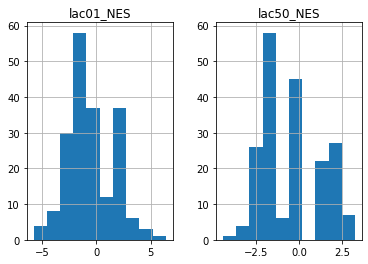

In [22]:
enrich_50_01[["lac01_NES", "lac50_NES","lac50_lac01_similarity"]].hist()

From observing the graph, we observed that the pathways enriched in different condition, genes differential expression are different. 

#### 2.1 pathways that are enriched in both conditions

In [23]:
both_enrich = enrich_50_01[(enrich_50_01.lac50_NES>0) & (enrich_50_01.lac01_NES>0)].sort_values(by = "lac50_lac01_similarity")
both_enrich.columns = ['Pathway ID', 'Name', 'Gene Set Size', 
                       'Spearman correlation', 'Toxication NES',
                       'Starvation NES']
both_enrich.reset_index(drop = True).to_csv("(no amp)EnrichFiles/PathEnrich_Tables/S1_consistent_enriched_pathways.csv")
both_enrich

,Pathway ID,Name,Gene Set Size,Spearman correlation,Toxication NES,Starvation NES
75,PUTDEG-PWY,putrescine degradation I,2,-0.9999999999999999,1.480025,4.659970
80,PWY0-1305,glutamate dependent acid resistance,2,-0.9999999999999999,1.185988,1.592129
78,PWY0-461,lysine degradation I,2,-0.9999999999999999,1.351552,1.839280
77,PWY0-1317,L-lactaldehyde degradation (aerobic),2,-0.9999999999999999,1.468054,2.015820
76,THRDLCTCAT-PWY,threonine degradation III (to methylglyoxal),2,-0.9999999999999999,1.468286,1.771821
71,PWY0-1280,ethylene glycol degradation,2,-0.9999999999999999,2.328461,2.445905
132,GLYCOLATEMET-PWY,glycolate and glyoxylate degradation I,7,0.3214285714285715,1.882449,1.863389
169,GLYCOL-GLYOXDEG-PWY,superpathway of glycol metabolism and degradation,11,0.36446563806256416,1.883722,2.026118
128,PWY0-42,2-methylcitrate cycle I,6,0.3714285714285715,1.690708,2.038000
155,PWY-6961,"L-ascorbate degradation II (bacterial, aerobic)",9,0.8333333333333333,2.110983,1.792049


array([[<AxesSubplot:title={'center':'Gene Set Size'}>,
        <AxesSubplot:title={'center':'Toxication NES'}>],
       [<AxesSubplot:title={'center':'Starvation NES'}>, <AxesSubplot:>]],
      dtype=object)

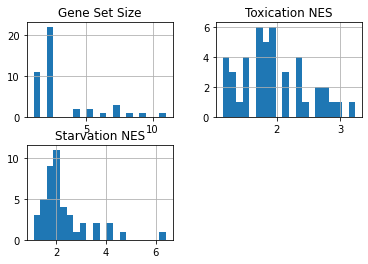

In [24]:
both_enrich.hist(bins = 20)

#### 2.2 pathways that are down regulated in both conditions

In [25]:
both_down = enrich_50_01[(enrich_50_01.lac50_NES<0) & (enrich_50_01.lac01_NES<0)].sort_values(by = "lac50_lac01_similarity")
both_down.columns = ['Pathway ID', 'Name', 'Gene Set Size', 
                       'Spearman correlation', 'Toxication NES',
                       'Starvation NES']
both_down.reset_index(drop = True).to_csv("(no amp)EnrichFiles/PathEnrich_Tables/S2_consistent_down_regulated_pathways.csv")
both_down

,Pathway ID,Name,Gene Set Size,Spearman correlation,Toxication NES,Starvation NES
97,PWY-6164,3-dehydroquinate biosynthesis I,4,0.19999999999999998,-1.717099,-1.674314
179,1CMET2-PWY,formylTHF biosynthesis,13,0.21028158800339597,-2.512738,-2.247681
115,PWY0-1544,proline to cytochrome <i>bo</i> oxidase electr...,5,0.3,-1.803656,-2.033507
104,PWY-7221,guanosine ribonucleotides <i>de novo</i> biosy...,4,0.39999999999999997,-1.975863,-1.733218
113,PWY-6123,inosine-5'-phosphate biosynthesis I,5,0.39999999999999997,-2.293961,-2.066307
180,SULFATE-CYS-PWY,superpathway of sulfate assimilation and cyste...,14,0.40468083504082186,-1.865053,-2.325134
183,BRANCHED-CHAIN-AA-SYN-PWY,"superpathway of leucine, valine, and isoleucin...",16,0.5441188553357554,-2.390705,-2.362830
152,VALSYN-PWY,valine biosynthesis,9,0.5506437651964586,-1.980251,-2.193133
168,DAPLYSINESYN-PWY,lysine biosynthesis I,11,0.570285213928281,-2.107329,-1.975862
136,THRESYN-PWY,threonine biosynthesis,7,0.5765999761251578,-2.181921,-2.205857


array([[<AxesSubplot:title={'center':'Gene Set Size'}>,
        <AxesSubplot:title={'center':'Toxication NES'}>],
       [<AxesSubplot:title={'center':'Starvation NES'}>, <AxesSubplot:>]],
      dtype=object)

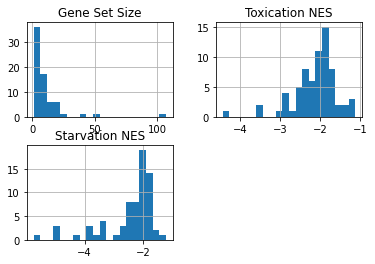

In [26]:
both_down.hist(bins = 20)

#### 2.3 lac0.1 pathways are enriched, but lac50 didn't 

In [27]:
lac01up_lac50non = enrich_50_01[(enrich_50_01.lac50_NES==0) & (enrich_50_01.lac01_NES>0)].sort_values(by = "lac50_lac01_similarity")
lac01up_lac50non.columns = ['Pathway ID', 'Name', 'Gene Set Size', 
                       'Spearman correlation', 'Toxication NES',
                       'Starvation NES']
lac01up_lac50non.reset_index(drop = True).to_csv("(no amp)EnrichFiles/PathEnrich_Tables/S3_lac0.1_unique_enriched_pathways.csv")
lac01up_lac50non

,Pathway ID,Name,Gene Set Size,Spearman correlation,Toxication NES,Starvation NES
162,FAO-PWY,fatty acid &beta;-oxidation I,9,-0.06666666666666667,0.0,2.223878
108,PWY-4261,glycerol degradation I,5,0.49999999999999994,0.0,2.032547
90,PWY0-1182,trehalose degradation II (trehalase),3,0.5,0.0,1.627063
126,PWY-6952,glycerophosphodiester degradation,6,0.7142857142857143,0.0,1.794637
134,PWY0-381,glycerol and glycerophosphodiester degradation,7,0.7567874686642696,0.0,1.926481
107,GLYOXDEG-PWY,glycolate and glyoxylate degradation II,5,0.8999999999999998,0.0,1.938467
37,PWY0-1299,arginine dependent acid resistance,2,0.9999999999999999,0.0,1.194795
21,DARABCAT-PWY,D-arabinose degradation II,1,NC,0.0,1.261240
22,PWY-7346,UDP-&alpha;-D-glucuronate biosynthesis (from U...,1,NC,0.0,2.062266
28,PWY0-1337,oleate &beta;-oxidation,1,NC,0.0,3.747271


array([[<AxesSubplot:title={'center':'Gene Set Size'}>,
        <AxesSubplot:title={'center':'Toxication NES'}>],
       [<AxesSubplot:title={'center':'Starvation NES'}>, <AxesSubplot:>]],
      dtype=object)

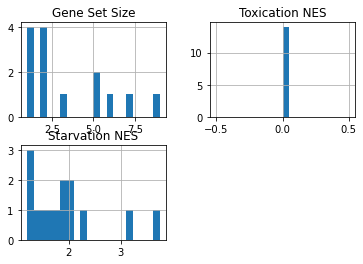

In [28]:
lac01up_lac50non.hist(bins = 20)

#### 2.4 lac0.1 pathways that are down regulated but lac50 are not

In [29]:
lac01down_lac50non = enrich_50_01[(enrich_50_01.lac50_NES==0) & (enrich_50_01.lac01_NES<0)].sort_values(by = "lac50_lac01_similarity")
lac01down_lac50non.columns = ['Pathway ID', 'Name', 'Gene Set Size', 
                       'Spearman correlation', 'Toxication NES',
                       'Starvation NES']
lac01down_lac50non.reset_index(drop = True).to_csv("(no amp)EnrichFiles/PathEnrich_Tables/S4_lac0.1_unique_down_regulated_pathways.csv")
lac01down_lac50non

,Pathway ID,Name,Gene Set Size,Spearman correlation,Toxication NES,Starvation NES
105,GLYCLEAV-PWY,glycine cleavage,4,-0.21081851067789195,0.0,-1.744469
43,BETSYN-PWY,glycine betaine biosynthesis I (Gram-negative ...,2,-0.9999999999999999,0.0,-1.595646
130,PWYCQD-2,dTDP-<i>N</i>-acetylviosamine biosynthesis,6,0.13093073414159545,0.0,-1.946939
175,OANTIGEN-PWY-1,<i>O</i>-antigen building blocks biosynthesis ...,12,0.30623504748186503,0.0,-2.226284
112,GALACTMETAB-PWY,galactose degradation I (Leloir pathway),5,0.3354101966249684,0.0,-1.834509
129,SO4ASSIM-PWY,sulfate reduction I (assimilatory),6,0.39279220242478635,0.0,-2.143081
92,PYRUVDEHYD-PWY,pyruvate decarboxylation to acetyl CoA,3,0.5,0.0,-1.614238
93,PWY-5084,2-oxoglutarate decarboxylation to succinyl-CoA,3,0.5,0.0,-1.614238
125,PWY-7315,dTDP-<i>N</i>-acetylthomosamine biosynthesis,6,0.50709255283711,0.0,-1.810035
148,PWY-7184,pyrimidine deoxyribonucleotides <i>de novo</i>...,8,0.5480245826494338,0.0,-1.770275


array([[<AxesSubplot:title={'center':'Gene Set Size'}>,
        <AxesSubplot:title={'center':'Toxication NES'}>],
       [<AxesSubplot:title={'center':'Starvation NES'}>, <AxesSubplot:>]],
      dtype=object)

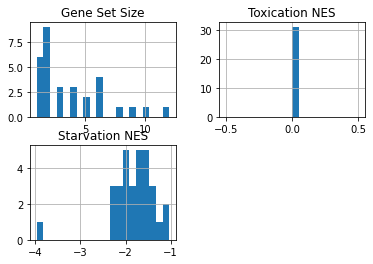

In [30]:
lac01down_lac50non.hist(bins = 20)

#### 2.5 lac50 pathways that are enriched but lac01 are not

In [31]:
lac50up_lac01non = enrich_50_01[(enrich_50_01.lac50_NES>0) & (enrich_50_01.lac01_NES==0)].sort_values(by = "lac50_lac01_similarity")
lac50up_lac01non.columns = ['Pathway ID', 'Name', 'Gene Set Size', 
                       'Spearman correlation', 'Toxication NES',
                       'Starvation NES']
lac50up_lac01non.reset_index(drop = True).to_csv("(no amp)EnrichFiles/PathEnrich_Tables/S5_lac50_unique_enriched_pathways.csv")
lac50up_lac01non

,Pathway ID,Name,Gene Set Size,Spearman correlation,Toxication NES,Starvation NES
153,PWYCQD-3,N-acetyl-galactosamine degradation,9,0.5166666666666667,1.841511,0.0
145,PWYCQD-4,galactosamine degradation,8,0.6666666666666669,1.917996,0.0
109,GALACTITOLCAT-PWY,galactitol degradation,5,0.7,1.596774,0.0
178,PWY0-1321,nitrate reduction III (dissimilatory),12,0.8041958041958043,1.903769,0.0
147,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,4-hydroxyphenylacetate degradation,8,0.880952380952381,1.735751,0.0
163,PWY0-1356,formate to dimethyl sulfoxide electron transfer,9,0.8833333333333333,1.699490,0.0
146,PWY-6690,cinnamate and 3-hydroxycinnamate degradation t...,8,0.9285714285714287,1.729005,0.0
151,HCAMHPDEG-PWY,3-phenylpropanoate and 3-(3-hydroxyphenyl)prop...,8,0.9285714285714287,1.729005,0.0
177,PWY0-1277,3-phenylpropionate and 3-(3-hydroxyphenyl)prop...,12,0.9702291586486096,1.926792,0.0
95,RHAMCAT-PWY,L-rhamnose degradation I,4,1.0,1.580329,0.0


array([[<AxesSubplot:title={'center':'Gene Set Size'}>,
        <AxesSubplot:title={'center':'Toxication NES'}>],
       [<AxesSubplot:title={'center':'Starvation NES'}>, <AxesSubplot:>]],
      dtype=object)

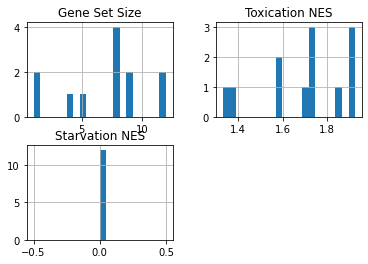

In [32]:
lac50up_lac01non.hist(bins = 20)

#### 2.6 lac50 pathways that are down regulated but lac01 are not

In [33]:
lac50down_lac01non = enrich_50_01[(enrich_50_01.lac50_NES<0) & (enrich_50_01.lac01_NES==0)].sort_values(by = "lac50_lac01_similarity")
lac50down_lac01non.columns = ['Pathway ID', 'Name', 'Gene Set Size', 
                       'Spearman correlation', 'Toxication NES',
                       'Starvation NES']
lac50down_lac01non.reset_index(drop = True).to_csv("(no amp)EnrichFiles/PathEnrich_Tables/S6_lac50_unique_down_regulated_pathways.csv")
lac50down_lac01non

,Pathway ID,Name,Gene Set Size,Spearman correlation,Toxication NES,Starvation NES
166,PWY-5188,tetrapyrrole biosynthesis I (from glutamate),10,0.0,-2.182899,0.0
149,PWY0-1061,superpathway of alanine biosynthesis,8,0.22094697908676547,-1.869139,0.0
158,PWY0-881,superpathway of fatty acid biosynthesis I (E. ...,9,0.3916747259003201,-2.400228,0.0
117,PWY0-862,<i>cis</i>-dodecenoyl biosynthesis,5,0.46169025843831935,-1.982263,0.0
119,PWY-5989,stearate biosynthesis II (bacteria and plants),5,0.46169025843831935,-1.976481,0.0
140,FASYN-ELONG-PWY,fatty acid elongation -- saturated,7,0.5188745216627708,-2.158664,0.0
138,PWY-5973,<i>cis</i>-vaccenate biosynthesis,7,0.523570314404736,-2.093701,0.0
167,BIOTIN-BIOSYNTHESIS-PWY,biotin biosynthesis I,11,0.5406702547064378,-1.784876,0.0
122,PWY-5971,palmitate biosynthesis II (bacteria and plants),6,0.5768179036829705,-1.982263,0.0
143,PWY-6284,superpathway of unsaturated fatty acids biosyn...,8,0.5997122939864165,-2.083852,0.0


array([[<AxesSubplot:title={'center':'Gene Set Size'}>,
        <AxesSubplot:title={'center':'Toxication NES'}>],
       [<AxesSubplot:title={'center':'Starvation NES'}>, <AxesSubplot:>]],
      dtype=object)

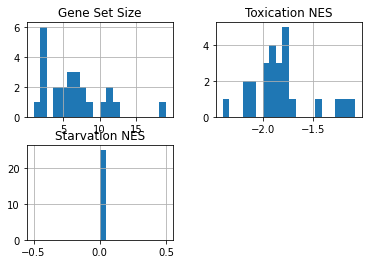

In [34]:
lac50down_lac01non.hist(bins = 20)

# Other comparison

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x = pathway_anlysorted["lac50_NES"], 
            y = pathway_anlysorted["ppgpp_NES"],
            s = pathway_anlysorted["pwy_size"]**2,
            c = pathway_anlysorted["lac50_ppgpp_similarity"],cmap='viridis',
            alpha=0.5, label=None
           )
#plt.colorbar(label='log$_{10}$(population)')
plt.colorbar(label='Similarties')
plt.xlabel("lac50 NES")
plt.ylabel("ppgpp NES")

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x = pathway_anlysorted["lac01_NES"], 
            y = pathway_anlysorted["ppgpp_NES"],
            s = pathway_anlysorted["pwy_size"]**2,
            c = pathway_anlysorted["lac01_ppgpp_similarity"],cmap='viridis',
            alpha=0.5, label=None
           )
#plt.colorbar(label='log$_{10}$(population)')
plt.colorbar(label='Similarties')
plt.xlabel("lac01 NES")
plt.ylabel("ppgpp NES")